<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.351441,97.926449,822.196691,996.474581,417.006807,579.467774
1,0.0,1.0,84.107038,45.665056,-949.182573,-809.410479,120.384627,-929.795106
2,0.0,2.0,68.358149,60.531338,493.038872,631.928359,192.555533,439.372826
3,0.0,3.0,52.001557,23.303357,13.522325,98.827239,-51.834378,150.661617
4,0.0,4.0,82.992735,59.579300,324.892600,477.464635,203.480626,273.984010
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,38.974523,79.902376,-171.090139,-42.213240,290.699393,-332.912633
119996,999.0,116.0,74.594377,25.399666,-12.087237,97.906806,-45.977729,143.884534
119997,999.0,117.0,49.945427,75.199090,1076.454624,1211.599141,237.292751,974.306390
119998,999.0,118.0,37.381506,29.980790,-36.002343,41.359953,87.845977,-46.486024


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    66.351441  97.926449   822.196691   996.474581  417.006807   
      1.0    84.107038  45.665056  -949.182573  -809.410479  120.384627   
      2.0    68.358149  60.531338   493.038872   631.928359  192.555533   
      3.0    52.001557  23.303357    13.522325    98.827239  -51.834378   
      4.0    82.992735  59.579300   324.892600   477.464635  203.480626   
...                ...        ...          ...          ...         ...   
999.0 115.0  38.974523  79.902376  -171.090139   -42.213240  290.699393   
      116.0  74.594377  25.399666   -12.087237    97.906806  -45.977729   
      117.0  49.945427  75.199090  1076.454624  1211.599141  237.292751   
      118.0  37.381506  29.980790   -36.002343    41.359953   87.845977   
      119.0  26.367426  71.578969 -1066.200131  -958.253736  294.936660   

                   e_hat  
rep   index               
0.0   0.0     579.467774  
      1.0    -929.795106  
      2.0     439.372826  
      3.0     150.661617  
      4.0     273.984010  
...                  ...  
999.0 115.0  -332.912633  
      116.0   143.884534  
      117.0   974.306390  
      118.0   -46.486024  
      119.0 -1253.190396  

[120000 rows x 6 columns]

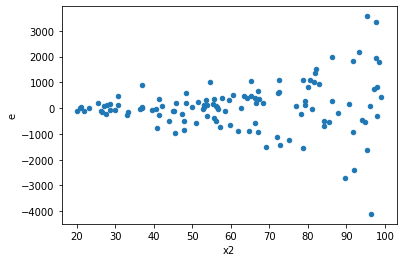

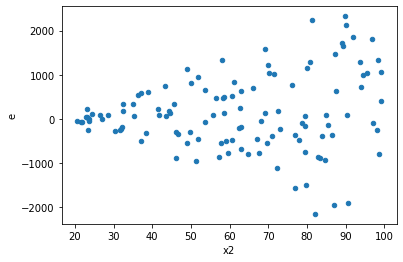

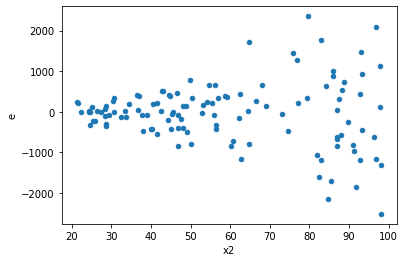

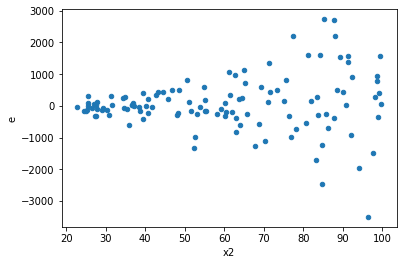

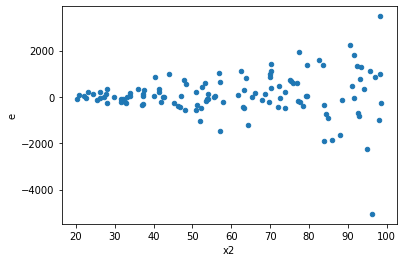

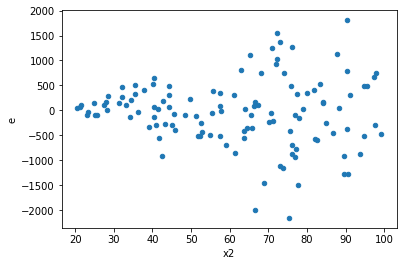

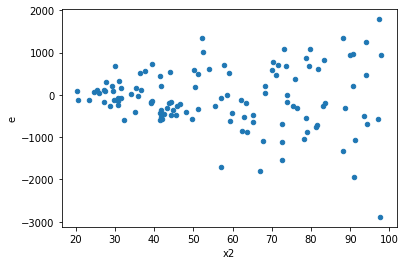

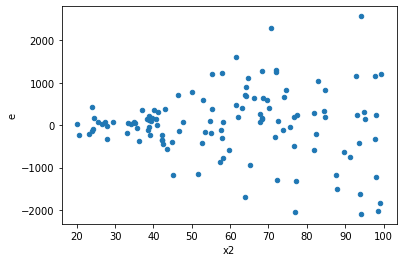

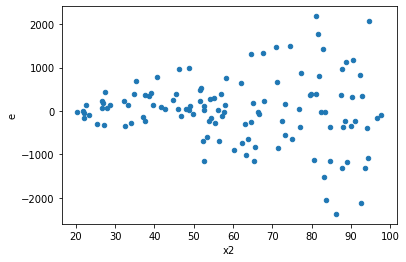

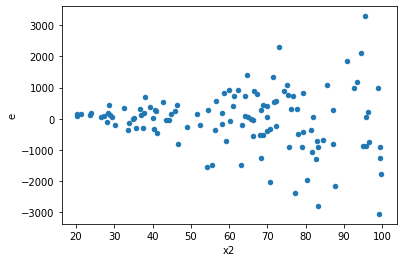

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,53.0,63.0,13983557.779002408,62810840.24280545,263840.7128113662,996997.4641715151,3.7787855162607973,7.487213036228013e-07,0.9999996256393482,3.7436065181140066e-07,Reject001=0 : Heteroscedasticity
4.0,49.0,67.0,15636982.403285611,83557216.58409809,319122.0898629717,1247122.6355835535,3.9079796579392463,3.278579918664093e-07,0.9999998360710041,1.6392899593320465e-07,Reject001=0 : Heteroscedasticity
7.0,69.0,47.0,43134596.737281926,31577894.555296868,625139.0831490135,671870.09692121,1.0747529870261803,0.801996481852822,0.599001759073589,0.400998240926411,Reject001=1 : Homoscedasticity
8.0,53.0,63.0,25002633.172597937,41601584.830183476,471747.795709395,660342.6163521187,1.3997789122874913,0.20014771626609118,0.8999261418669544,0.10007385813304559,Reject001=1 : Homoscedasticity
11.0,64.0,52.0,57708023.24785687,52640723.99567597,901687.8632477636,1012321.6153014611,1.1226962861130336,0.6698702613381409,0.6650648693309296,0.33493513066907044,Reject001=1 : Homoscedasticity
13.0,66.0,50.0,11901372.953600595,66342450.36897632,180323.83263031204,1326849.0073795263,7.3581455541694485,1.7652324046935064e-11,0.9999999999911738,8.826162023467532e-12,Reject001=0 : Heteroscedasticity
14.0,54.0,62.0,28379049.259860653,36743764.330030896,525537.9492566788,592641.3601617886,1.1276851861982964,0.644738493093274,0.677630753453363,0.322369246546637,Reject001=1 : Homoscedasticity
15.0,66.0,50.0,25251474.608502068,62902044.48083612,382598.10012881923,1258040.8896167225,3.288152474340947,2.3330452628256282e-05,0.9999883347736859,1.1665226314128141e-05,Reject001=0 : Heteroscedasticity
18.0,59.0,57.0,22412819.95060001,62672021.88549743,379878.30424745777,1099509.1558859197,2.894372075457315,8.589743110487547e-05,0.9999570512844476,4.294871555243773e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,69.0,47.0,105210637.0181623,5574254.402125541,1524791.8408429318,118601.15749203278,0.07778186786890726,6.065039503257329e-20,Reject001=0 : Heteroscedasticity
1.0,53.0,63.0,13983557.779002408,62810840.24280545,263840.7128113662,996997.4641715151,3.7787855162607973,7.487213036228013e-07,Reject001=0 : Heteroscedasticity
2.0,68.0,48.0,60766843.70405858,7300451.479792923,893630.0544714497,152092.73916235255,0.17019653535747517,5.6001596588391636e-11,Reject001=0 : Heteroscedasticity
3.0,66.0,50.0,74276695.36924955,11969939.291735623,1125404.4752916598,239398.78583471247,0.2127224398789332,8.750853047988113e-09,Reject001=0 : Heteroscedasticity
4.0,49.0,67.0,15636982.403285611,83557216.58409809,319122.0898629717,1247122.6355835535,3.9079796579392463,3.278579918664093e-07,Reject001=0 : Heteroscedasticity
5.0,53.0,63.0,26482731.34732257,24063241.780960858,499674.17636457674,381956.21874541044,0.7644105635483635,0.31643303128673234,Reject001=1 : Homoscedasticity
6.0,57.0,59.0,42647027.14428646,16442609.404793158,748193.4586716923,278688.2949964942,0.3724815978627565,0.00025158115586215637,Reject001=0 : Heteroscedasticity
7.0,69.0,47.0,43134596.737281926,31577894.555296868,625139.0831490135,671870.09692121,1.0747529870261803,0.801996481852822,Reject001=1 : Homoscedasticity
8.0,53.0,63.0,25002633.172597937,41601584.830183476,471747.795709395,660342.6163521187,1.3997789122874913,0.20014771626609118,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    712
Reject001=1 : Homoscedasticity      288
Name: Result_test, dtype: int64